In [1]:
# Import some standard things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the class to read the lbl/tab files
from planetpy.pdstools.indices import IndexLabel

No GDAL found.Some util funcs not working, but okay.


In [3]:
# Where did I download the data? 
datadir = '/Users/lynnej/Downloads/asteroids/'

In [4]:
# I downloaded some data ..
!ls $datadir/ | grep -v zip

EAR_A_M3SPEC_3_RDR_SMASS_V2_1
EAR_A_RDR_3_52COLOR_V2_1


In [5]:
# Read the SMASS spectra 
# More info on the catalog - 
# https://sbnarchive.psi.edu/pds3/non_mission/EAR_A_M3SPEC_3_RDR_SMASS_V2_1/catalog/smass.cat
lbl_file = os.path.join(datadir, 'EAR_A_M3SPEC_3_RDR_SMASS_V2_1', 'data', 'smass.lbl')
spec_labels = IndexLabel(lbl_file)
spec_data = spec_labels.read_index_data()

Done.


In [6]:
# Peek at the spec_data
spec_data[0:5]

,AST_NUMBER,PROV_ID,WAVELENGTH,SCALED_REFLECTANCE
0,3,---,4563,0.861
1,3,---,4573,0.864
2,3,---,4584,0.872
3,3,---,4594,0.884
4,3,---,4605,0.869


In [7]:
# Can group by ast_number to gather data from each object.
g = spec_data.groupby('AST_NUMBER')

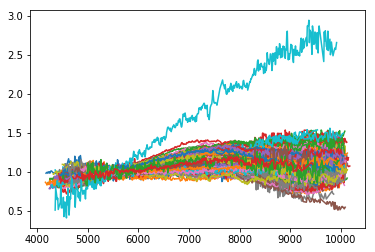

In [8]:
for i, ast in g:
    plt.plot(ast.WAVELENGTH, ast.SCALED_REFLECTANCE)

In [9]:
# Read another data set, with colors.
# Catalog info - https://sbnarchive.psi.edu/pds3/non_mission/EAR_A_RDR_3_52COLOR_V2_1/catalog/dataset.cat

# Note there are multiple data* directories, but the others repeat the data for each object individually
color_labels = IndexLabel(os.path.join(datadir, 'EAR_A_RDR_3_52COLOR_V2_1', 'data', 'data0', '52color.lbl'))
color_data = color_labels.read_index_data()

Done.


In [10]:
color_data[0:5]

,AST_NUMBER,SOLAR_ANALOG,OBSERVATION_DATE,REFL_08289,REFL_08533,REFL_08776,REFL_09021,REFL_09265,REFL_09510,REFL_09755,...,REFL_20840,REFL_21400,REFL_21960,REFL_22520,REFL_23060,REFL_23610,REFL_24140,REFL_24660,REFL_25190,REFL_25700
0,1,B,1985-12-22,1.0022,1.0050,0.9990,0.9932,0.9890,0.9831,0.9780,...,1.0014,1.0029,1.0035,1.0095,1.0092,1.0118,1.0173,1.0185,1.0231,1.0219
1,2,B,1985-12-22,0.9905,0.9815,0.9874,0.9810,0.9779,0.9625,0.9536,...,0.8864,0.8922,0.8884,0.8864,0.8821,0.8755,0.8742,0.8688,0.8635,0.8579
2,3,B,1985-05-05,1.0962,1.0775,1.0608,1.0587,1.0457,1.0553,1.0652,...,1.1950,1.2117,1.2116,1.2241,1.2282,1.2344,1.2427,1.2563,-0.9999,-0.9999
3,4,B,1985-05-05,0.9378,0.8744,0.8137,0.7685,0.7513,0.7670,0.7995,...,0.9440,0.9817,1.0190,1.0570,1.0878,1.1185,1.1496,1.1843,1.1983,1.2435
4,5,B,9999-99-99,1.1034,1.0946,1.0613,1.0524,1.0727,1.0670,1.0842,...,1.2315,1.2450,1.2578,1.2505,1.2579,1.2655,1.2635,1.2465,-0.9999,-0.9999


In [11]:
# Wavelengths for the 52 color data. You could pull this out of the titles of the columns too I suppose.
color_wavelengths = IndexLabel(os.path.join(datadir, 'EAR_A_RDR_3_52COLOR_V2_1', 'data', 
                                            'data0', '52waves.lbl')).read_index_data()
color_wavelengths

Done.


,EFF_WL_01,EFF_WL_02,EFF_WL_03,EFF_WL_04,EFF_WL_05,EFF_WL_06,EFF_WL_07,EFF_WL_08,EFF_WL_09,EFF_WL_10,...,EFF_WL_43,EFF_WL_44,EFF_WL_45,EFF_WL_46,EFF_WL_47,EFF_WL_48,EFF_WL_49,EFF_WL_50,EFF_WL_51,EFF_WL_52
0,0.8289,0.8533,0.8776,0.9021,0.9265,0.951,0.9755,1.0001,1.0247,1.0493,...,2.084,2.14,2.196,2.252,2.306,2.361,2.414,2.466,2.519,2.57


In [12]:
# And there is error information for the colors available as well. 
color_errors = IndexLabel(os.path.join(datadir, 'EAR_A_RDR_3_52COLOR_V2_1', 'data', 
                                            'data0', '52error.lbl' )).read_index_data()
color_errors[0:5]

Done.


,AST_NUMBER,SOLAR_ANALOG,OBSERVATION_DATE,ERROR_08289,ERROR_08533,ERROR_08776,ERROR_09021,ERROR_09265,ERROR_09510,ERROR_09755,...,ERROR_20840,ERROR_21400,ERROR_21960,ERROR_22520,ERROR_23060,ERROR_23610,ERROR_24140,ERROR_24660,ERROR_25190,ERROR_25700
0,1,B,1985-12-22,7,17,1,6,12,7,16,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,2,B,1985-12-22,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,3,B,1985-05-05,100,105,120,69,65,75,25,...,38,57,21,72,85,107,119,141,-9999,-9999
3,4,B,1985-05-05,42,37,33,61,54,23,26,...,39,64,65,76,30,78,49,33,31,29
4,5,B,9999-99-99,112,32,7,53,163,89,269,...,117,33,33,51,12,149,111,105,212,948


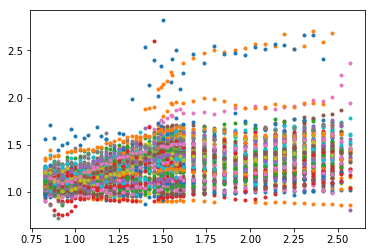

In [13]:
# This is clumsy but it will work for now.
wavelengths = color_wavelengths.values[0]
for ast in color_data.AST_NUMBER.unique():
    color_phot = color_data.query('AST_NUMBER == @ast').values[0][3:]
    color_phot = np.where(color_phot < 0, np.nan, color_phot)
    color_error = color_errors.query('AST_NUMBER == @ast').values[0][3:]
    color_error = np.where(color_error == -9999, 0, color_error)
    #plt.errorbar(wavelengths, color_phot, yerr=color_error)
    plt.plot(wavelengths, color_phot, linestyle='', marker='.')

In [14]:
# Asteroids in both data sets
in_both = set(color_data.AST_NUMBER.unique()).intersection(set(spec_data.AST_NUMBER.unique()))

/Users/lynnej/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


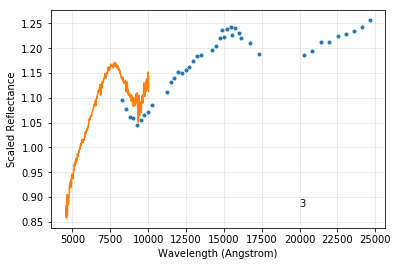

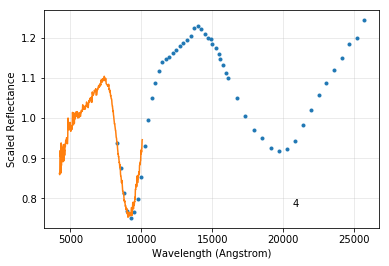

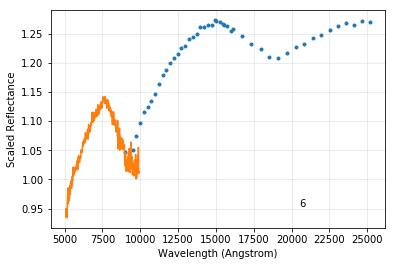

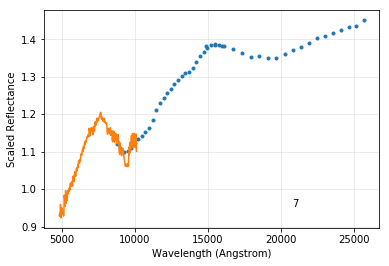

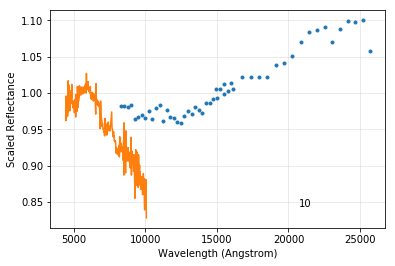

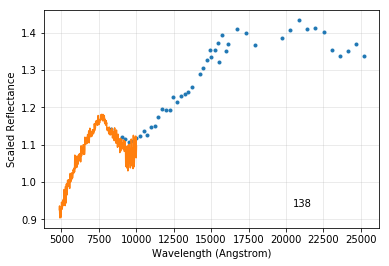

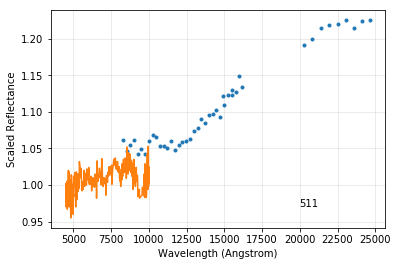

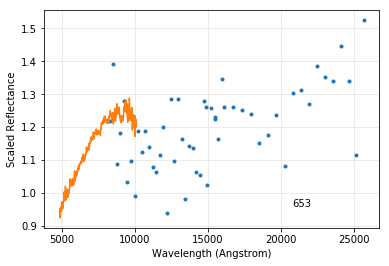

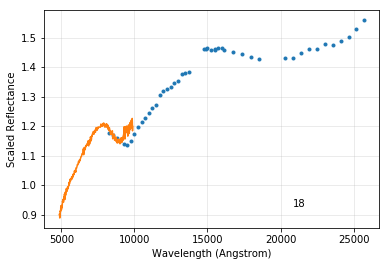

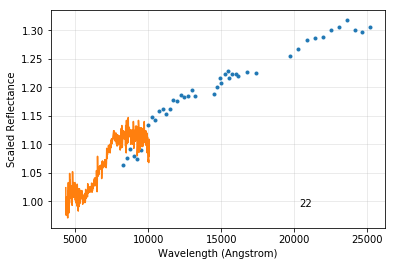

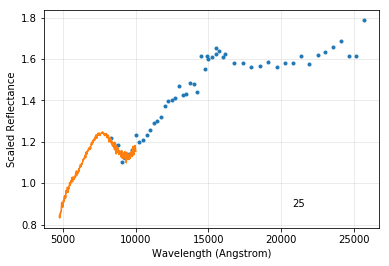

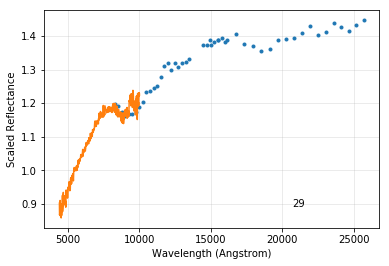

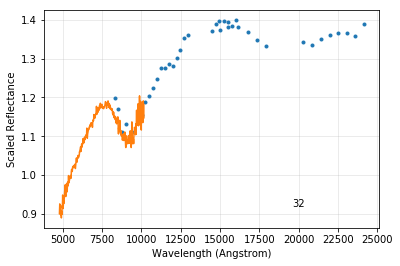

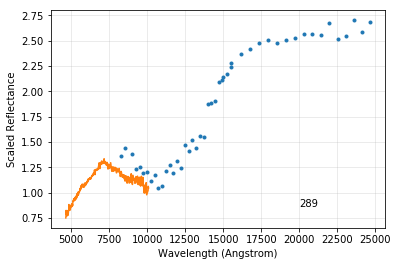

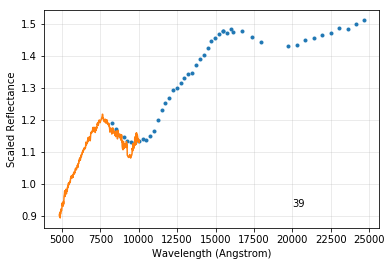

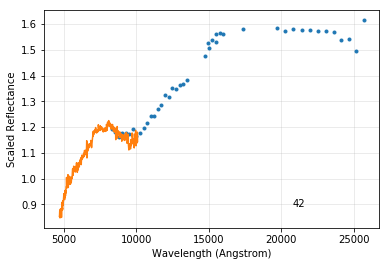

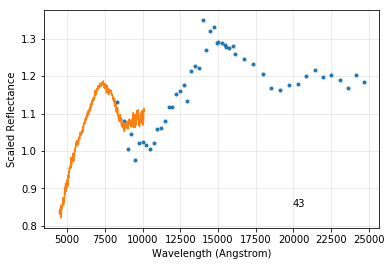

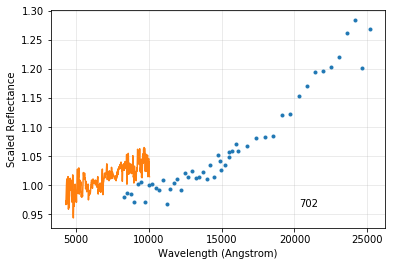

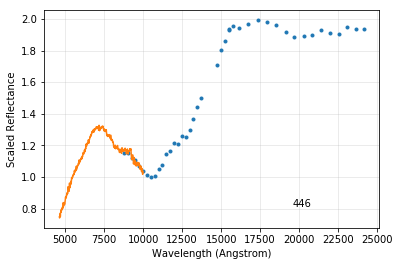

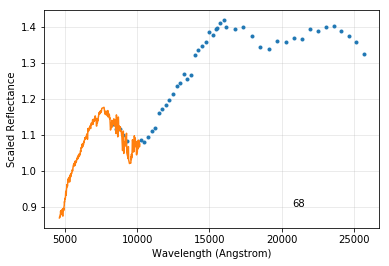

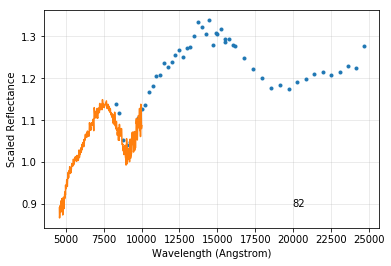

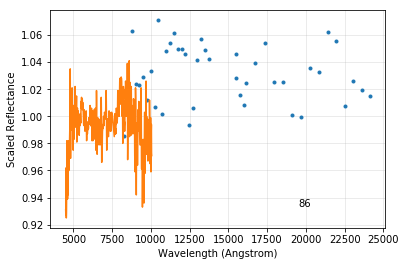

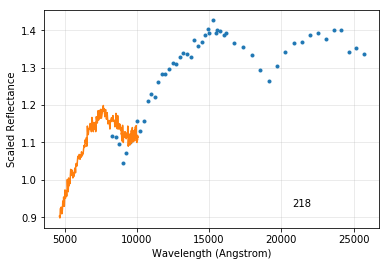

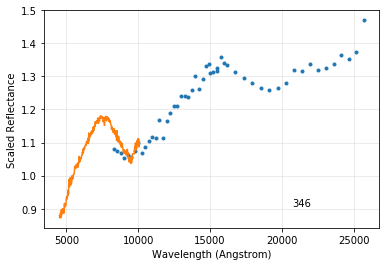

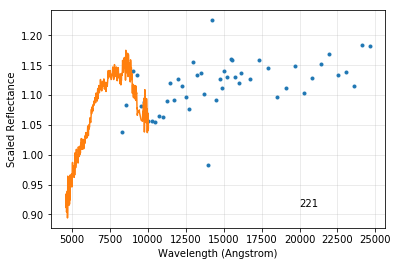

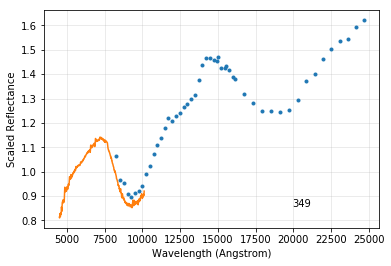

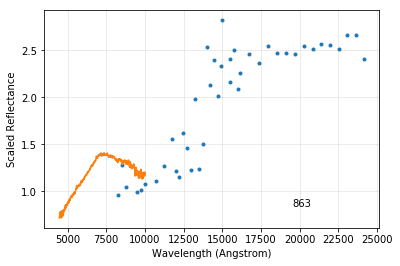

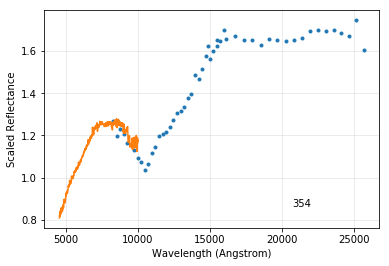

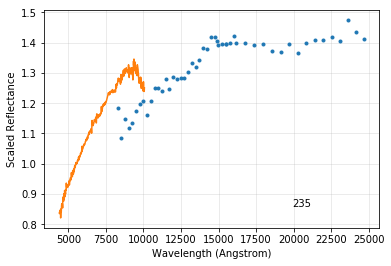

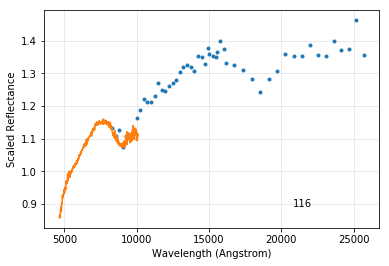

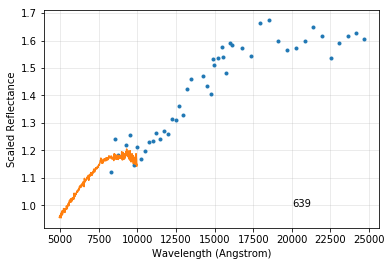

In [15]:
# Note that wavelength is in microns in color data, angstroms in spectral data
for ast in in_both:
    plt.figure()
    color_phot = color_data.query('AST_NUMBER == @ast').values[0][3:]
    color_phot = np.where(color_phot < 0, np.nan, color_phot)
    color_error = color_errors.query('AST_NUMBER == @ast').values[0][3:]
    color_error = np.where(color_error == -9999, 0, color_error)
    #plt.errorbar(wavelengths * 10000, color_phot, yerr=color_error)
    plt.plot(wavelengths * 10000, color_phot, marker='.', linestyle='')
    spec_phot = spec_data.query('AST_NUMBER == @ast')
    plt.plot(spec_phot.WAVELENGTH, spec_phot.SCALED_REFLECTANCE)
    plt.xlabel("Wavelength (Angstrom)")
    plt.ylabel("Scaled Reflectance")
    plt.grid(alpha=0.3)
    plt.figtext(0.7, 0.2, '%s' % (ast))